In [1]:
# created on 2025-14-01 17∶23∶43
# @author: n.piatte

# Network science and Graph Learning

In [97]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
import glob
import pandas as pd

## Q2 : Social Network Analysis with the Facebook100 dataset

### (a) Degree distribution

In [2]:
# Import data from gml file
data_caltech = nx.read_gml("data/Caltech36.gml")
data_mit = nx.read_gml("data/MIT8.gml")
data_JHU = nx.read_gml("data/Johns Hopkins55.gml")

data = [data_caltech, data_mit, data_JHU]
names = ["Caltech", "MIT", "Johns Hopkins"]

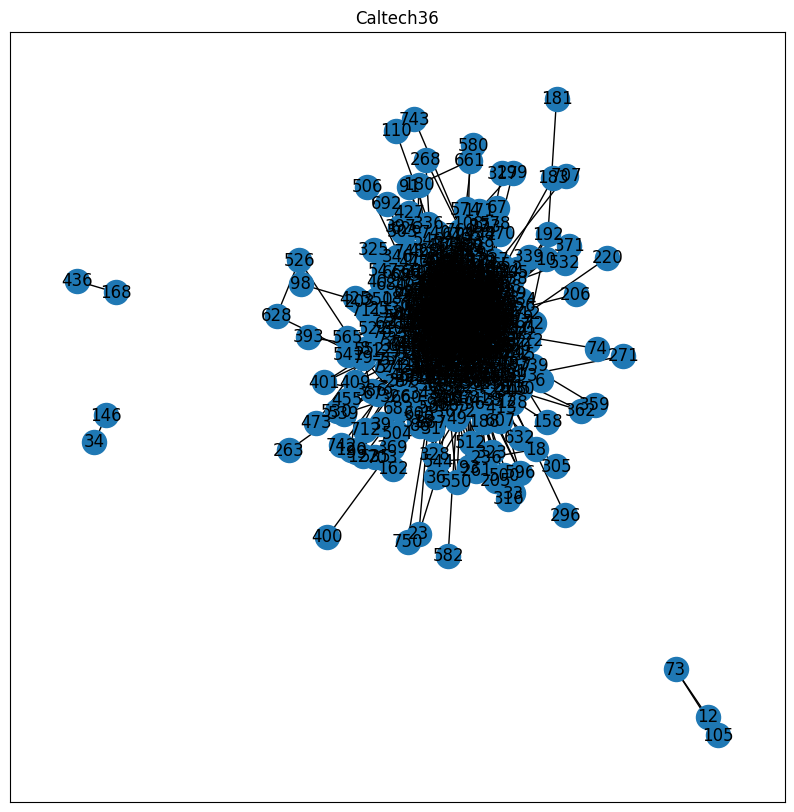

In [4]:
# Visualice caltech data
plt.figure(figsize=(10, 10))
# Create a position dictionary, with nodes as far as possible from each other
pos = nx.spring_layout(data_caltech, k=0.1, scale=0.1)
nx.draw_networkx(data_caltech, with_labels=True, node_size=300, pos=pos)
plt.title("Caltech36")
plt.show()

In [5]:
nb_total_nodes = []
nb_total_edges = []
for i in range(3):
    nb_total_nodes.append(data[i].number_of_nodes())
    nb_total_edges.append(data[i].number_of_edges())

print(f"Number of nodes in Caltech36: {nb_total_nodes[0]}, MIT8: {nb_total_nodes[1]}, Johns Hopkins55: {nb_total_nodes[2]}")
print(f"Number of edges in Caltech36: {nb_total_edges[0]}, MIT8: {nb_total_edges[1]}, Johns Hopkins55: {nb_total_edges[2]}")

Number of nodes in Caltech36: 769, MIT8: 6440, Johns Hopkins55: 5180
Number of edges in Caltech36: 16656, MIT8: 251252, Johns Hopkins55: 186586


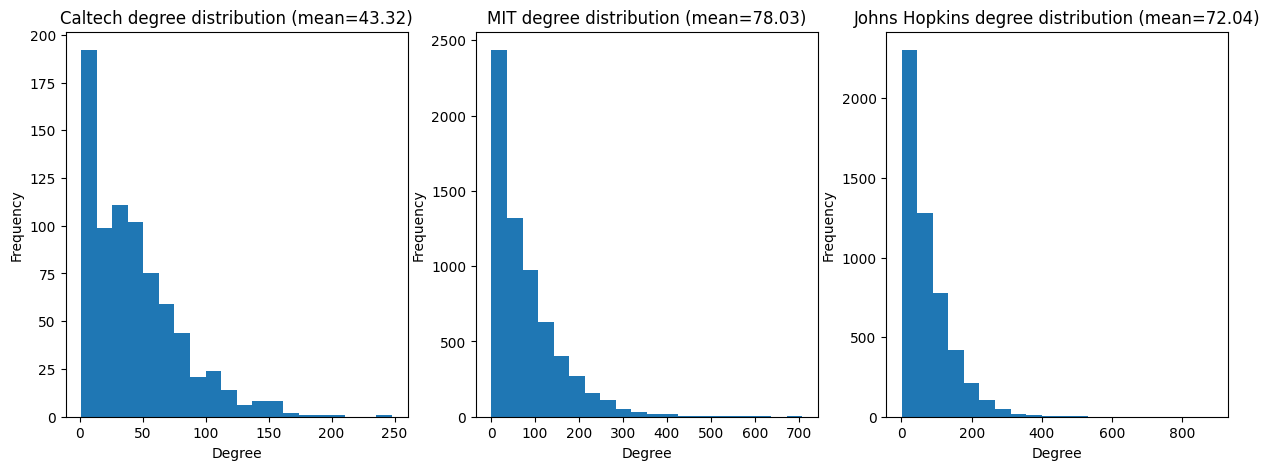

In [18]:
# Plot the degree distribution of the three networks
plt.figure(figsize=(15, 5))
for i, graph in enumerate(data):
    degree_sequence = [d for n, d in graph.degree()]
    mean_ds = np.mean(degree_sequence)
    plt.subplot(1, 3, i+1)
    plt.hist(degree_sequence, bins=20)
    plt.title(f"{names[i]} degree distribution (mean={mean_ds:.2f})")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
plt.show()

### (b) Global clustering coefficient, mean local clustering coefficient, edge density

In [15]:
# Global clustering coefficient
global_clustering_coefficient = []
for i in range(3):
    global_clustering_coefficient.append(nx.transitivity(data[i]))

print(f"Global clustering coefficient of Caltech36: {global_clustering_coefficient[0]:.5f},"
      f" MIT8: {global_clustering_coefficient[1]:.5f},"
      f" Johns Hopkins55: {global_clustering_coefficient[2]:.5f}")

Global clustering coefficient of Caltech36: 0.29128, MIT8: 0.18029, Johns Hopkins55: 0.19316


In [16]:
# Mean local clustering coefficient
mean_local_clustering_coefficient = []
for i in range(3):
    mean_local_clustering_coefficient.append(nx.average_clustering(data[i]))

print(f"Mean local clustering coefficient of Caltech36: {mean_local_clustering_coefficient[0]:.5f},"
        f" MIT8: {mean_local_clustering_coefficient[1]:.5f},"
        f" Johns Hopkins55: {mean_local_clustering_coefficient[2]:.5f}")

Mean local clustering coefficient of Caltech36: 0.40929, MIT8: 0.27122, Johns Hopkins55: 0.26839


In [17]:
# Edge density
edge_density = []
for i in range(3):
    edge_density.append(nb_total_edges[i] / (nb_total_nodes[i] * (nb_total_nodes[i] - 1) / 2))

print(f"Edge density of Caltech36: {edge_density[0]:.5f},"
        f" MIT8: {edge_density[1]:.5f},"
        f" Johns Hopkins55: {edge_density[2]:.5f}")

Edge density of Caltech36: 0.05640, MIT8: 0.01212, Johns Hopkins55: 0.01391


### (c) Degree vs. clustering coefficient

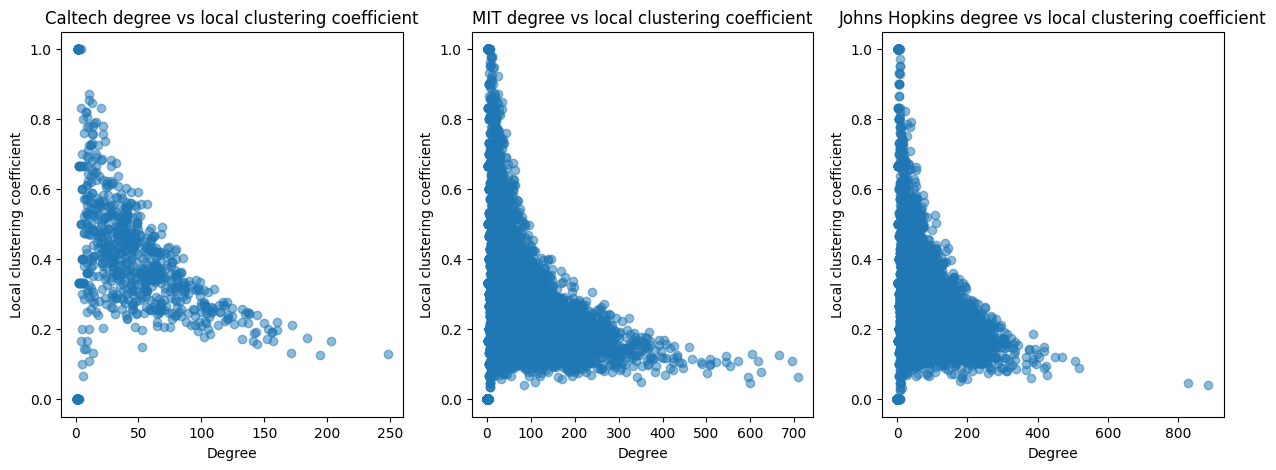

In [22]:
# Plot degree versus local clustering coefficient
plt.figure(figsize=(15, 5))
for i, graph in enumerate(data):
    degrees = dict(graph.degree())
    local_clustering_coefficients = nx.clustering(graph)
    plt.subplot(1, 3, i+1)
    plt.scatter(degrees.values(), local_clustering_coefficients.values(), alpha=0.5)
    plt.title(f"{names[i]} degree vs local clustering coefficient")
    plt.xlabel("Degree")
    plt.ylabel("Local clustering coefficient")
plt.show()

## Q3 : Assortativity Analysis with the Facebook100 Dataset

In [24]:
# Load all GML files in the data folder
data_folder = "data"
file_pattern = os.path.join(data_folder, "*.gml")
gml_files = glob.glob(file_pattern)

graphs = []

# Load each GML file using NetworkX
for gml_file in gml_files:
    try:
        graph = nx.read_gml(gml_file)
        graphs.append(graph)
        print(f"Loaded graph from {gml_file}")
    except Exception as e:
        print(f"Failed to load {gml_file}: {e}")

Loaded graph from data/Hamilton46.gml
Loaded graph from data/Maryland58.gml
Loaded graph from data/BC17.gml
Loaded graph from data/American75.gml
Loaded graph from data/UF21.gml
Loaded graph from data/Indiana69.gml
Loaded graph from data/Northwestern25.gml
Loaded graph from data/Wake73.gml
Loaded graph from data/Trinity100.gml
Loaded graph from data/Brandeis99.gml
Loaded graph from data/Georgetown15.gml
Loaded graph from data/Wellesley22.gml
Loaded graph from data/MIT8.gml
Loaded graph from data/Texas80.gml
Loaded graph from data/Temple83.gml
Loaded graph from data/Lehigh96.gml
Loaded graph from data/Wesleyan43.gml
Loaded graph from data/William77.gml
Loaded graph from data/Rice31.gml
Loaded graph from data/Tufts18.gml
Loaded graph from data/Johns Hopkins55.gml
Loaded graph from data/Villanova62.gml
Loaded graph from data/Brown11.gml
Loaded graph from data/Harvard1.gml
Loaded graph from data/Oberlin44.gml
Loaded graph from data/MU78.gml
Loaded graph from data/Tennessee95.gml
Loaded gra

In [49]:
def assortivity(graphs, attribute):
    assortivities = []
    sizes = [graph.number_of_nodes() for graph in graphs]
    for graph in graphs:
        if attribute == "degree":
            assortivities.append(nx.degree_assortativity_coefficient(graph))
        else:
            assortivities.append(nx.attribute_assortativity_coefficient(graph, attribute))
    return assortivities, sizes

def plot_assortivity(assortivities, sizes, attribute):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    # Plot assortivity vs size, with log scale
    plt.scatter(sizes, assortivities)
    plt.xscale("log")
    plt.xlabel("Network size")
    plt.ylabel(f"{attribute.capitalize()} assortativity")
    plt.title(f"{attribute.capitalize()} assortativity vs network size")
    # Add dotted line at assortativity 0
    plt.axhline(0, color="grey", linestyle="--")
    plt.subplot(1, 2, 2)
    # Plot assortivity distribution
    min_a, max_a = min(assortivities), max(assortivities)
    mean_a = np.mean(assortivities)
    plt.hist(assortivities, bins=20, range=(min_a, max_a))
    plt.xlabel(f"{attribute.capitalize()} assortativity")
    plt.ylabel("Frequency")
    plt.title(f"{attribute.capitalize()} assortativity distribution (mean={mean_a:.2f})")
    # Add vertical line at assortativity 0
    plt.axvline(0, color="grey", linestyle="--")
    plt.show()

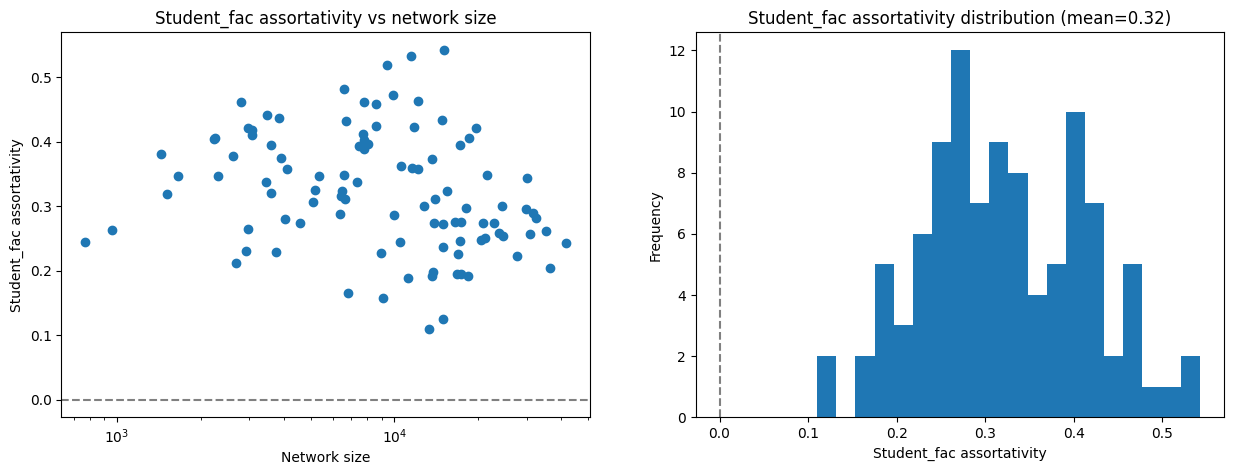

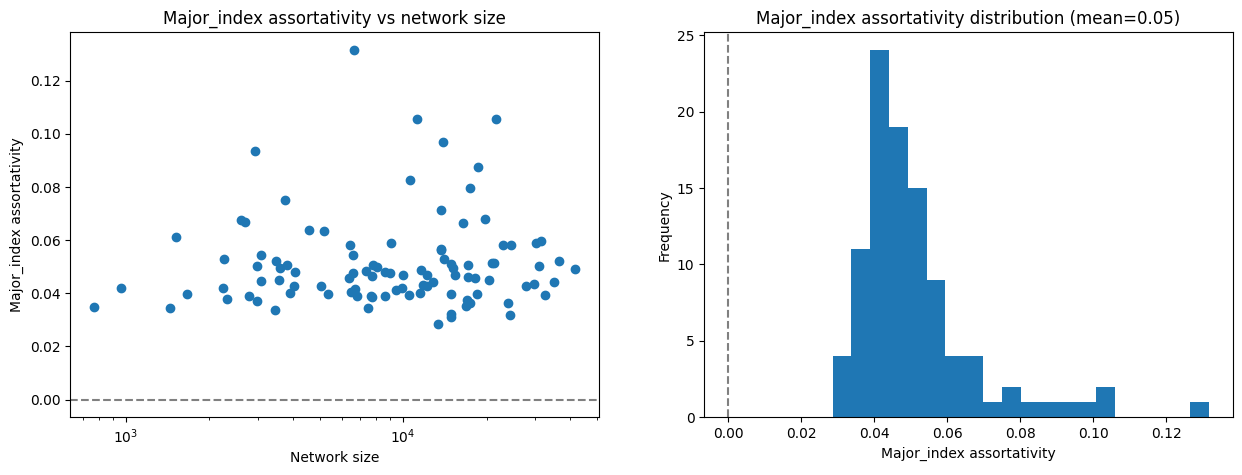

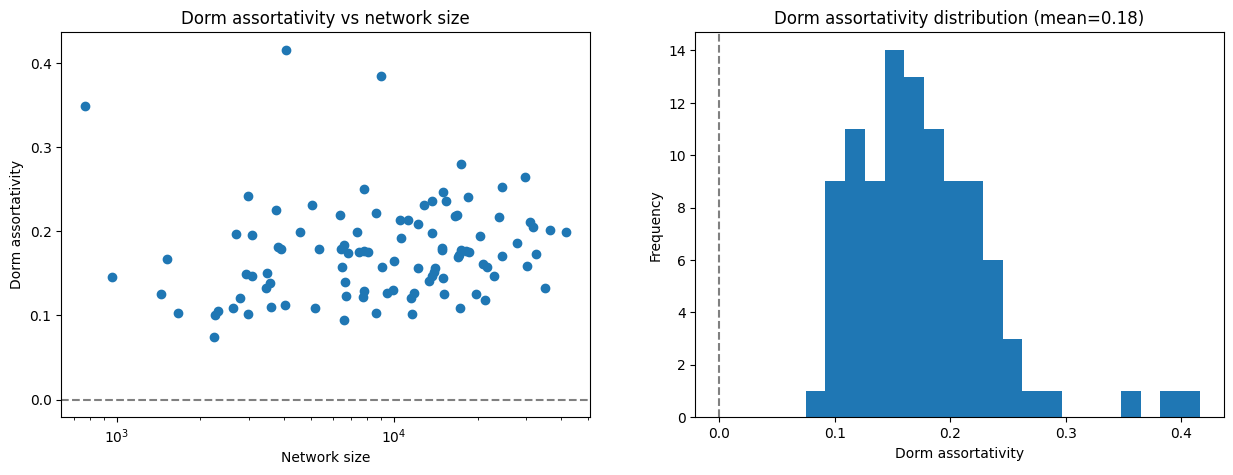

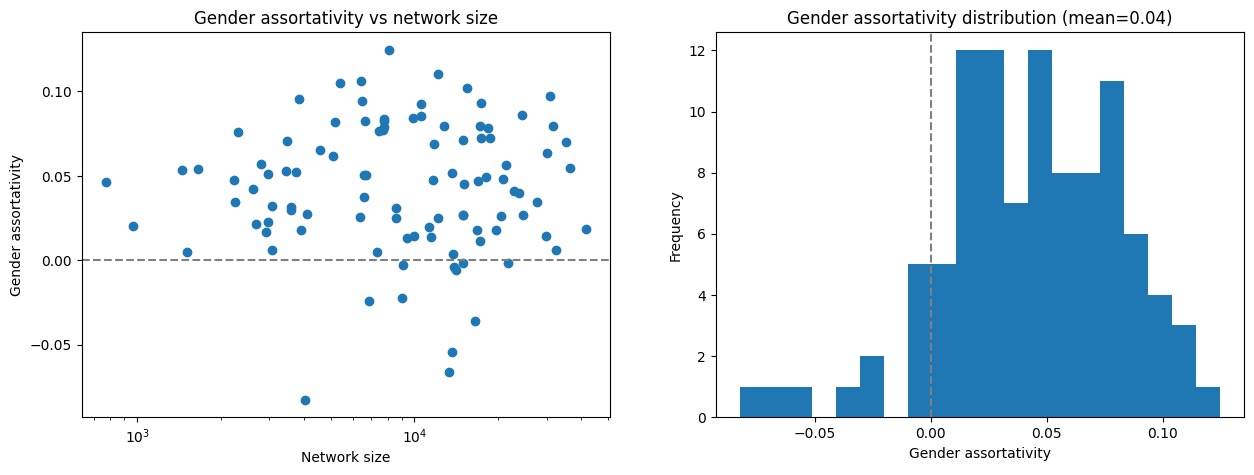

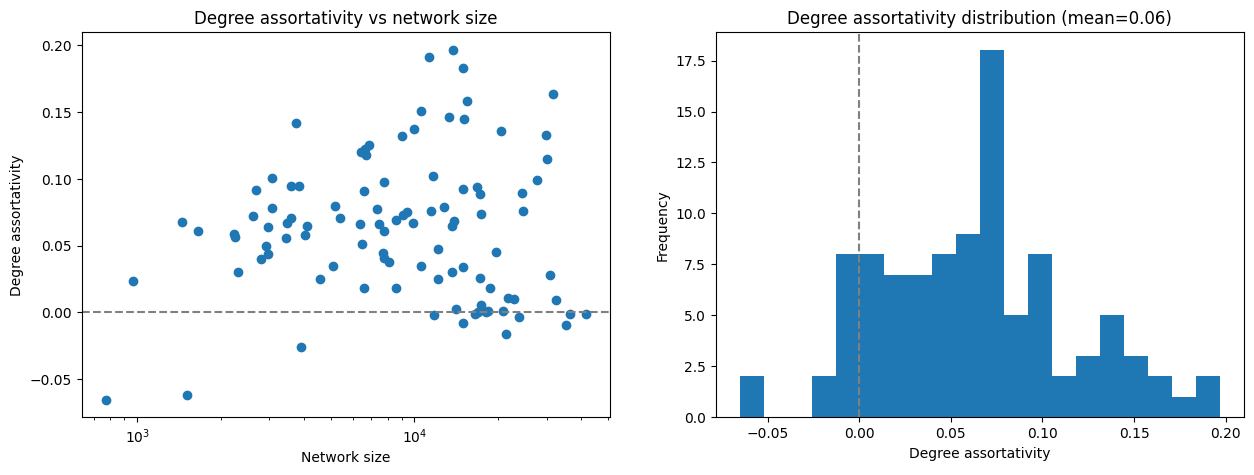

In [50]:
attributes = ["student_fac", "major_index", "dorm", "gender", "degree"]
for attribute in attributes:
    assortivities, sizes = assortivity(graphs, attribute)
    plot_assortivity(assortivities, sizes, attribute)

## Q4 : Link prediction

### (b) Implementing different link prediction metrics

In [3]:
# 2 different graphs to compare
# We choose them because they have very different sizes and structures
graph1 = data_caltech
graph2 = data_mit

In [29]:
# Reimport the class to avoid Jupyter Notebook caching
import importlib
import link_prediction
importlib.reload(link_prediction)
from link_prediction import CommonNeighbors, Jaccard, AdamicAdar

#### i - Common Neighbors

In [26]:
# Evaluate the common neighbors measure
cn1 = CommonNeighbors(graph1)
df_top, df_precision, df_recall = cn1.evaluate(list_k_s=[50, 100, 400, 1600])

df_precision, df_recall

Done


(      50    100    400      1600
 0.05  72.0  73.0  75.50  75.6250
 0.10  72.0  78.0  79.00  76.1875
 0.15  72.0  76.0  77.00  76.0625
 0.20  70.0  74.0  78.25  74.0625,
       50    100    400      1600
 0.05  72.0  73.0  75.50  75.6250
 0.10  72.0  78.0  79.00  76.1875
 0.15  72.0  76.0  77.00  76.0625
 0.20  70.0  74.0  78.25  74.0625,
           50        100       400       1600
 0.05  0.216138  0.438280  1.813160  7.264649
 0.10  0.216138  0.468300  1.897214  7.318684
 0.15  0.216138  0.456292  1.849183  7.306676
 0.20  0.210134  0.444284  1.879203  7.114553)

In [27]:
cn2 = CommonNeighbors(graph2)
df_top, df_precision, df_recall = cn2.evaluate(list_k_s=[50, 100, 400, 1600])

df_precision, df_recall

Done


(      50    100    400      1600
 0.05  92.0  92.0  85.25  82.6875
 0.10  90.0  91.0  85.50  83.2500
 0.15  92.0  93.0  85.25  83.4375
 0.20  92.0  90.0  82.50  82.3125,
       50    100    400      1600
 0.05  92.0  92.0  85.25  82.6875
 0.10  90.0  91.0  85.50  83.2500
 0.15  92.0  93.0  85.25  83.4375
 0.20  92.0  90.0  82.50  82.3125,
           50        100       400       1600
 0.05  0.018308  0.036617  0.135720  0.526563
 0.10  0.017910  0.036219  0.136118  0.530145
 0.15  0.018308  0.037015  0.135720  0.531339
 0.20  0.018308  0.035821  0.131342  0.524175)

#### ii - Jaccard Coefficient

In [30]:
jac1 = Jaccard(graph1)
df_top, df_precision, df_recall = jac1.evaluate(list_k_s=[50, 100, 400, 1600])

df_precision, df_recall

Done


(      50    100    400      1600
 0.05  74.0  69.0  72.75  70.8125
 0.10  46.0  62.0  72.75  71.8750
 0.15  64.0  73.0  75.00  70.8125
 0.20  46.0  56.0  67.50  69.3750,
           50        100       400       1600
 0.05  0.222142  0.414265  1.747118  6.802354
 0.10  0.138088  0.372238  1.747118  6.904419
 0.15  0.192123  0.438280  1.801153  6.802354
 0.20  0.138088  0.336215  1.621037  6.664265)

In [31]:
jac2 = Jaccard(graph2)
df_top, df_precision, df_recall = jac2.evaluate(list_k_s=[50, 100, 400, 1600])

df_precision, df_recall

Done


(      50    100    400      1600
 0.05  38.0  60.0  63.50  69.5625
 0.10  30.0  56.0  58.75  69.5000
 0.15  36.0  52.0  57.50  68.5000
 0.20  24.0  52.0  55.75  64.6250,
           50        100       400       1600
 0.05  0.007562  0.023880  0.101094  0.442982
 0.10  0.005970  0.022288  0.093532  0.442584
 0.15  0.007164  0.020696  0.091542  0.436215
 0.20  0.004776  0.020696  0.088756  0.411539)

#### iii - Adamic-Adar Index

In [32]:
aa1 = AdamicAdar(graph1)
df_top, df_precision, df_recall = aa1.evaluate(list_k_s=[50, 100, 400, 1600])

df_precision, df_recall

Done


(      50    100    400      1600
 0.05  66.0  73.0  76.75  77.0625
 0.10  66.0  73.0  77.75  76.9375
 0.15  64.0  70.0  76.75  76.4375
 0.20  70.0  75.0  79.00  76.8750,
           50        100       400       1600
 0.05  0.198127  0.438280  1.843180  7.402738
 0.10  0.198127  0.438280  1.867195  7.390730
 0.15  0.192123  0.420269  1.843180  7.342699
 0.20  0.210134  0.450288  1.897214  7.384726)

In [33]:
aa2 = AdamicAdar(graph2)
df_top, df_precision, df_recall = aa2.evaluate(list_k_s=[50, 100, 400, 1600])

df_precision, df_recall

Done


(      50    100    400      1600
 0.05  90.0  92.0  84.00  82.9375
 0.10  94.0  92.0  85.00  82.3750
 0.15  92.0  92.0  84.00  82.6250
 0.20  96.0  91.0  85.25  83.4375,
           50        100       400       1600
 0.05  0.017910  0.036617  0.133730  0.528155
 0.10  0.018706  0.036617  0.135322  0.524573
 0.15  0.018308  0.036617  0.133730  0.526165
 0.20  0.019104  0.036219  0.135720  0.531339)

## Q5 : Find missing labels with the label propagation algorithms

### (d) Evaluation of the label propagation algorithm

In [41]:
import label_propagation
importlib.reload(label_propagation)
from label_propagation import evaluate_lpa

In [42]:
df_accuracy, df_mae, df_f1 = evaluate_lpa(graph1)

df_accuracy.T, df_mae.T, df_f1.T

(attribute        dorm     gender  major_index
 proportion                                   
 0.1         89.986996  89.986996    89.986996
 0.2         80.234070  79.973992    79.973992
 0.3         69.960988  70.741222    93.368010
 0.4         60.208062  60.468140    96.879064,
 attribute        dorm     gender  major_index
 proportion                                   
 0.1         10.013004  10.013004    10.013004
 0.2         19.765930  20.026008    20.026008
 0.3         30.039012  29.258778     6.631990
 0.4         39.791938  39.531860     3.120936,
 attribute        dorm     gender  major_index
 proportion                                   
 0.1         89.986996  89.986996    89.986996
 0.2         80.234070  79.973992    79.973992
 0.3         69.960988  70.741222    93.368010
 0.4         60.208062  60.468140    96.879064)

## Q6 : Community detection with the FB100 datasets

### (c) Hypothesis testing

In [107]:
import community_detection
importlib.reload(community_detection)
from community_detection import (
    labels_from_louvain,
    unique_attributes_in_communities,
    communities_from_louvain,
    prop_attributes_in_communities,
    correlation_attributes_in_communities
)

In [64]:
labels = labels_from_louvain(graph1)

In [67]:
communities = communities_from_louvain(graph1)
len(communities)

8

In [70]:
for i, community in enumerate(communities.values()):
    print(f"Community {i}: {len(community)} nodes")

Community 0: 117 nodes
Community 1: 77 nodes
Community 2: 159 nodes
Community 3: 79 nodes
Community 4: 104 nodes
Community 5: 92 nodes
Community 6: 17 nodes
Community 7: 117 nodes


In [75]:
communities.items()

dict_items([(2, [0, 4, 11, 28, 30, 32, 33, 36, 40, 52, 57, 68, 69, 75, 77, 86, 92, 96, 102, 113, 115, 118, 127, 134, 135, 141, 147, 148, 154, 159, 163, 191, 210, 211, 215, 217, 222, 225, 233, 241, 242, 259, 261, 264, 266, 269, 272, 273, 299, 304, 305, 317, 319, 323, 328, 334, 336, 337, 339, 347, 349, 350, 368, 369, 370, 400, 406, 422, 426, 429, 446, 447, 452, 459, 461, 467, 469, 470, 473, 475, 485, 490, 491, 495, 503, 517, 521, 523, 527, 544, 546, 551, 560, 563, 574, 578, 594, 598, 617, 633, 636, 644, 653, 656, 661, 668, 677, 684, 693, 694, 696, 724, 730, 737, 744, 746, 761]), (6, [1, 3, 8, 19, 26, 37, 42, 64, 76, 95, 103, 116, 117, 119, 130, 155, 156, 158, 165, 167, 169, 174, 178, 194, 206, 219, 245, 246, 247, 257, 281, 296, 302, 320, 325, 344, 354, 358, 380, 387, 389, 395, 399, 425, 428, 434, 437, 448, 449, 460, 466, 484, 499, 501, 510, 514, 515, 519, 532, 540, 558, 565, 577, 588, 621, 654, 667, 672, 676, 681, 682, 686, 704, 725, 733, 735, 754]), (0, [2, 7, 9, 12, 21, 23, 24, 35, 41,

In [111]:
unique_attributes = unique_attributes_in_communities(graph1, ["major_index", "dorm"], communities)
unique_attributes

{2: {'major_index': {0,
   190,
   192,
   194,
   196,
   197,
   199,
   200,
   201,
   202,
   204,
   205,
   206,
   207,
   208,
   209,
   211,
   212,
   221,
   222,
   223,
   227,
   228},
  'dorm': {0, 165, 166, 167, 168, 169, 170, 171, 172}},
 6: {'major_index': {0,
   190,
   195,
   196,
   199,
   200,
   201,
   202,
   204,
   205,
   207,
   208,
   209,
   211,
   212,
   220,
   222,
   223,
   224,
   228},
  'dorm': {0, 165, 166, 167, 168, 169, 170, 171, 172}},
 0: {'major_index': {0,
   190,
   192,
   194,
   196,
   198,
   199,
   200,
   201,
   202,
   204,
   205,
   207,
   208,
   209,
   212,
   217,
   221,
   222,
   223,
   226,
   228},
  'dorm': {0, 165, 166, 167, 168, 169, 170, 171, 172}},
 5: {'major_index': {0,
   190,
   192,
   194,
   197,
   199,
   200,
   201,
   202,
   204,
   205,
   206,
   207,
   208,
   209,
   212,
   220,
   221,
   222,
   223,
   228,
   229},
  'dorm': {0, 165, 166, 167, 168, 169, 170, 171, 172}},
 3: {'major_

In [95]:
proportions = prop_attributes_in_communities(graph1, communities, unique_attributes)
# For each community, print the proportion of each attribute
# (we only show the 5 most common values for each attribute)
proportions

{2: {'community_size': 117,
  'major_index': {208: 0.1538,
   199: 0.1197,
   228: 0.1197,
   223: 0.094,
   0: 0.0769},
  'dorm': {0: 0.2735, 170: 0.1624, 169: 0.1197, 168: 0.1111, 172: 0.094}},
 6: {'community_size': 77,
  'major_index': {228: 0.1818,
   0: 0.1299,
   223: 0.0909,
   208: 0.0779,
   199: 0.0779},
  'dorm': {0: 0.2468, 171: 0.1818, 172: 0.1429, 166: 0.1039, 169: 0.0909}},
 0: {'community_size': 159,
  'major_index': {0: 0.1195,
   223: 0.0943,
   222: 0.0943,
   208: 0.0818,
   199: 0.0755},
  'dorm': {0: 0.2201, 169: 0.1447, 172: 0.1384, 170: 0.0943, 167: 0.0943}},
 5: {'community_size': 79,
  'major_index': {0: 0.1266,
   205: 0.1013,
   228: 0.1013,
   199: 0.0886,
   209: 0.0759},
  'dorm': {0: 0.2152, 170: 0.1519, 169: 0.1392, 172: 0.1139, 168: 0.1013}},
 3: {'community_size': 104,
  'major_index': {208: 0.1442,
   199: 0.1442,
   228: 0.125,
   222: 0.0769,
   0: 0.0769},
  'dorm': {0: 0.25, 169: 0.1635, 171: 0.125, 168: 0.1058, 167: 0.0865}},
 4: {'community_si

In [120]:
# Compute the mean of the most common values for each attribute
mean_major_index = 0
mean_dorm = 0
for community, infos in proportions.items():
    for attribute, values in infos.items():
        if attribute == "major_index":
            mean_major_index += list(values.values())[0]
        elif attribute == "dorm":
            mean_dorm += list(values.values())[0]
mean_major_index /= len(communities)
mean_dorm /= len(communities)
mean_major_index, mean_dorm

(0.16255, 0.2274875)

In [108]:
correlations = correlation_attributes_in_communities(graph1, communities, unique_attributes)
# For each community, print the correlation between each pair of attributes
correlations

{2: {('dorm', 'major_index'): 0.0513},
 6: {('dorm', 'major_index'): 0.0909},
 0: {('dorm', 'major_index'): 0.0818},
 5: {('dorm', 'major_index'): 0.1139},
 3: {('dorm', 'major_index'): 0.0673},
 4: {('dorm', 'major_index'): 0.0652},
 7: {('dorm', 'major_index'): 0.1176},
 1: {('dorm', 'major_index'): 0.0598}}

In [124]:
# Compute the mean correlation between attributes
mean_correlation = 0
for community, infos in correlations.items():
    for pair, value in infos.items():
        mean_correlation += value
mean_correlation /= len(communities)
print(f"Mean correlation between attributes: {100*mean_correlation:.2f}%")

Mean correlation between attributes: 8.10%
